# Using Pillow (PIL)

In [8]:
from PIL import Image  # Needed to use Image without qualifier; alternative is `import PIL.Image`

In [14]:
# Load image from a JPEG file
img = Image.open("example_rock.jpg")

In [15]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [16]:
# horiz,vert pixel counts
img.size

(960, 720)

In [17]:
# grayscale ("L"), color ("RGB"), or color with transparency ("RGBA")?
img.mode

'RGB'

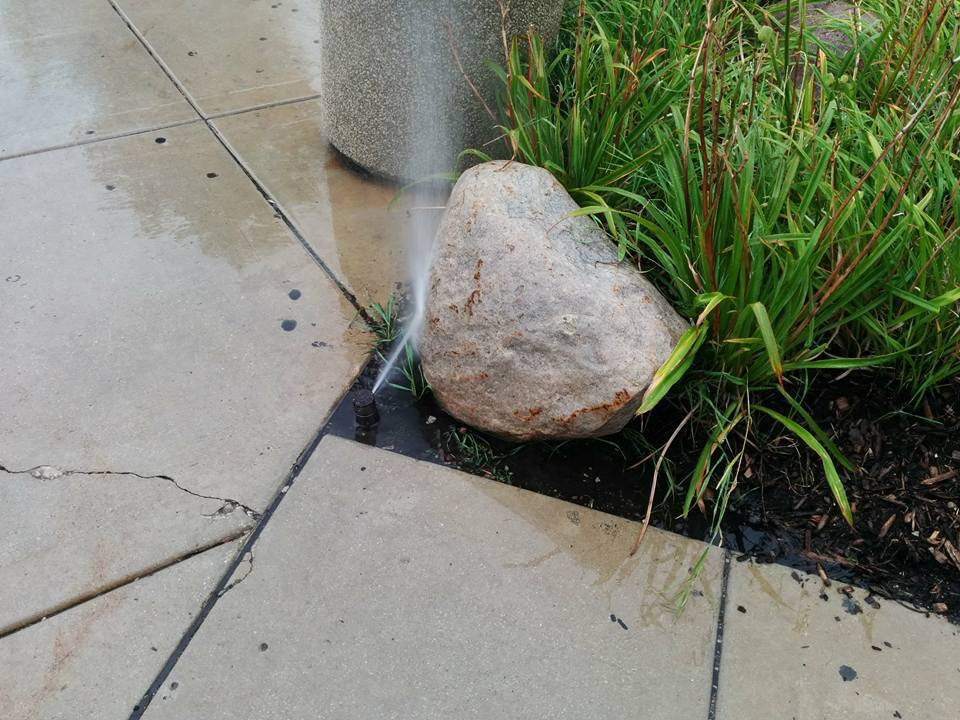

In [18]:
# PIL images display natively in notebooks
img

Let's get the color of a pixel a little right of the middle.

In [36]:
c = img.getpixel( (690,360) ) 
# Return value is ( Red_byte, Green_byte, Blue_byte )
c

(61, 103, 40)

In [37]:
# Color swatch to see that color
Image.new("RGB", (30,30), color=c )

Somewhere in the grass, apparently

In [39]:
# Draw a circle around the location we just highlighted
x0 = 690 # coords of the pixel we sampled above
y0 = 360
for x in range(x0-50,x0+51):
    for y in range(y0-50,y0+51):
        if 30**2 < (x-x0)**2 + (y-y0)**2 < 45**2:
            img.putpixel((x,y),(255,0,0))  # bright red


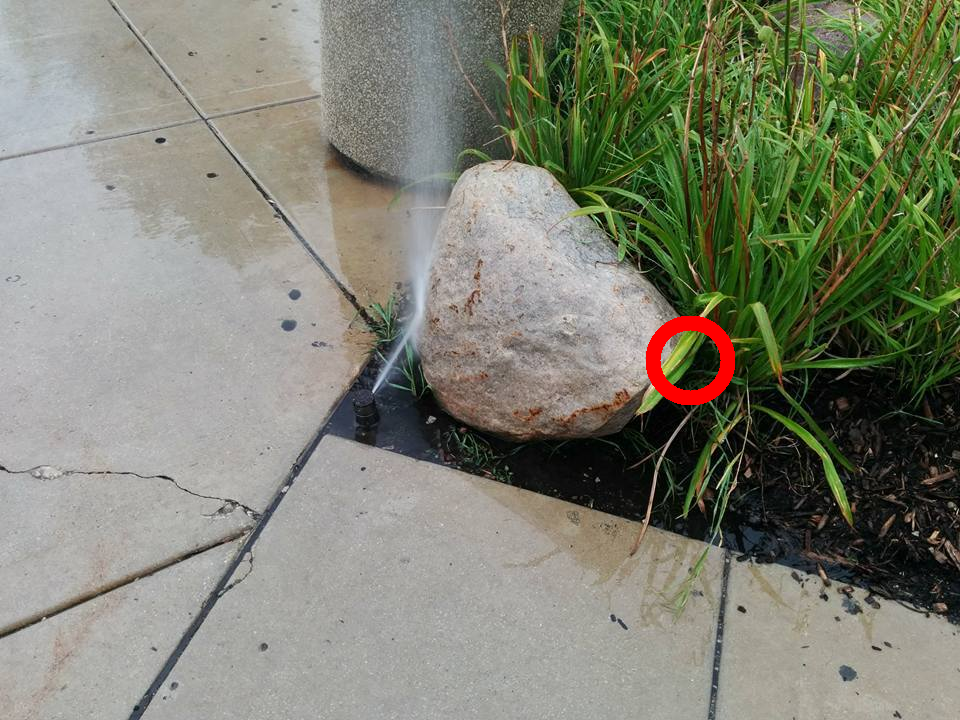

In [41]:
img  # Now we can see where the green color above came from!

Let's write a function that takes an image object and draws a white plus sign at a specified location.

In [42]:
def plusmark(im,location):
    "Put a white plus sign at location `location` in the image `im`"
    cx = location[0]
    cy = location[1]
    # horizontal line
    for i in range(-10,11):
        im.putpixel( (cx+i,cy), (255,255,255) )
    # vertical line
    for j in range(-10,11):
        im.putpixel( (cx,cy+j), (255,255,255) )

In [47]:
plusmark(img,(190,450))
plusmark(img,(800,150))
plusmark(img,(600,200))

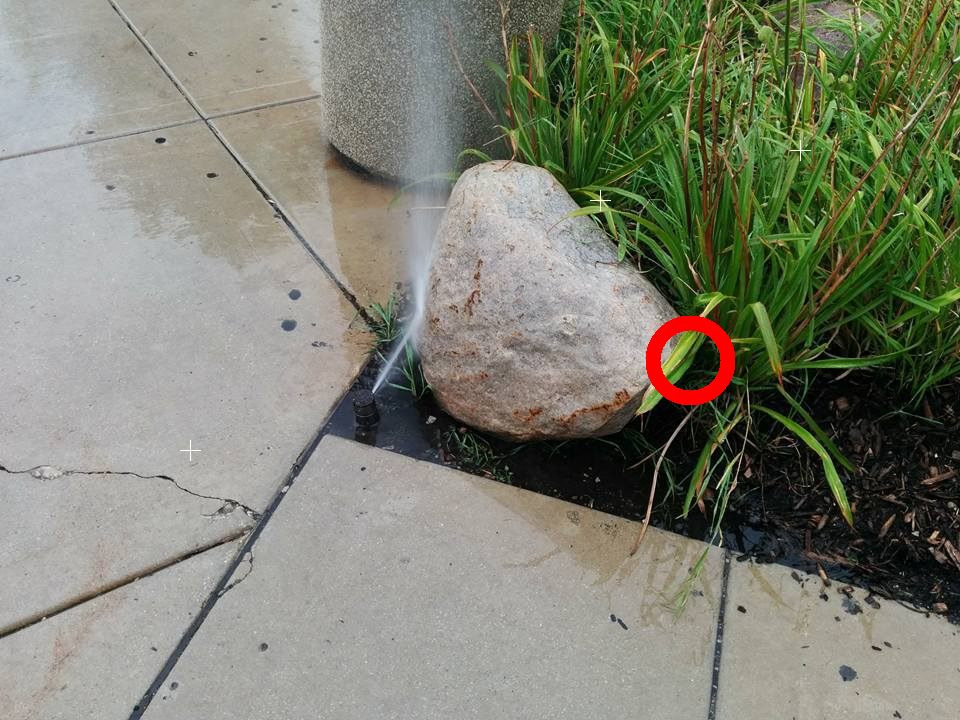

In [49]:
img  # Note a few white plus marks

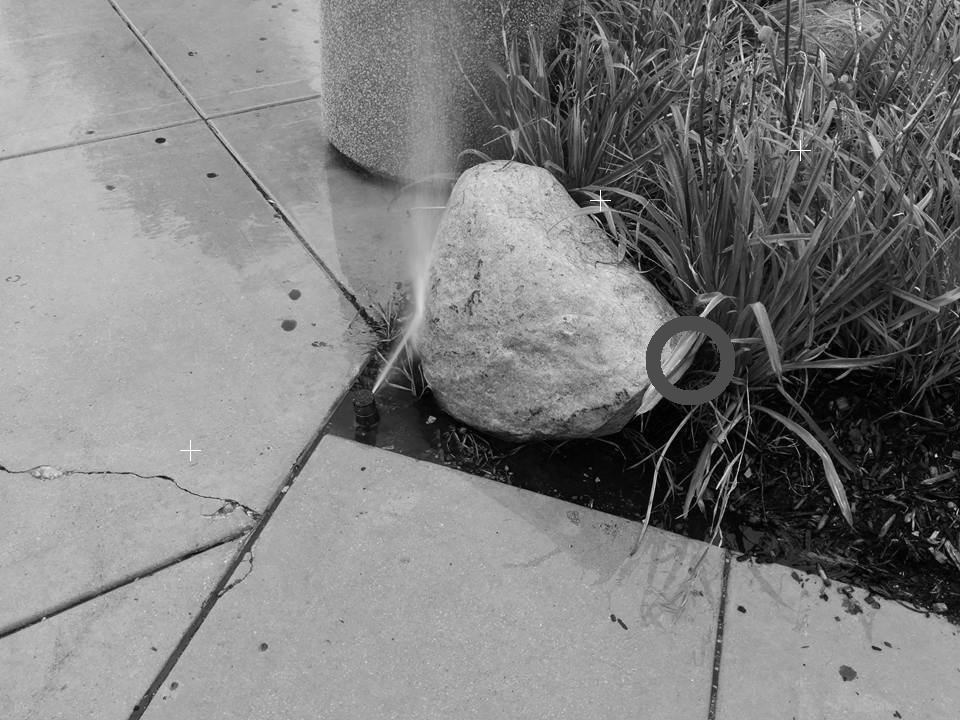

In [50]:
# Conversion to a different mode, in this case grayscale
img.convert("L")

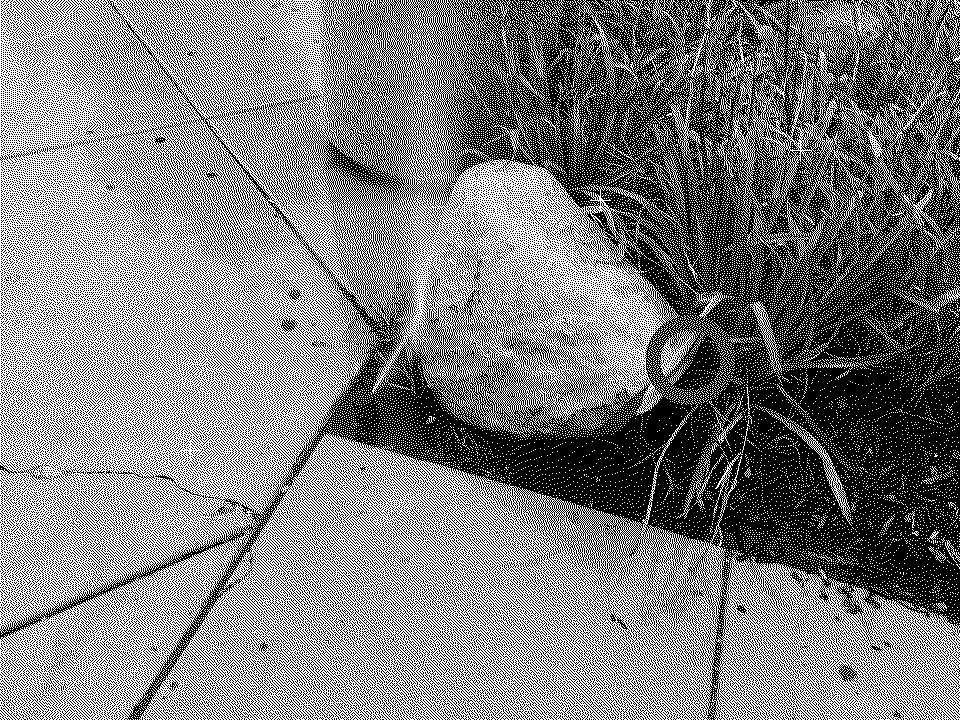

In [51]:
# Black and white (1 bit per pixel).  Will use dithering to try to look more like grayscale.
img.convert("1")

## Create an image from scratch

In [52]:
# 300x300 pixel color image, filled with black
img = Image.new("RGB",(300,300),color=(0,0,0))

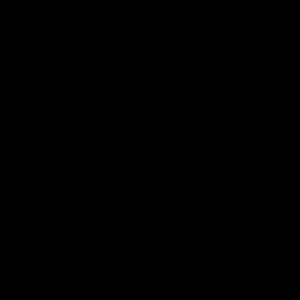

In [53]:
img

Fill it with a smoothed ring.

In [55]:
def blend(color0,color1,t):
    "returns color0 if t=0, color1 if t=1, a blend otherwise"
    return tuple([int((1-t)*color0[i] + t*color1[i]) for i in range(3)])

In [58]:
BLACK = (0,0,0)
ORANGE = (255,95,31)
for x in range(300):
    for y in range(300):
        p = (x,y)
        dist_to_center = ((x-150)**2 + (y-150)**2)**(0.5)
        if  75 < dist_to_center < 95:
            # in the ring: full white
            img.putpixel(p, ORANGE)
        elif 73 < dist_to_center <= 75:
            # near the inner edge of the ring
            # somewhere between purple and white
            t = (dist_to_center - 73)/2
            img.putpixel(p, blend(BLACK,ORANGE,t))
        elif 95 <= dist_to_center < 97:
            # near the outer edge...
            t = (dist_to_center - 95)/2
            img.putpixel(p, blend(ORANGE,BLACK,t))

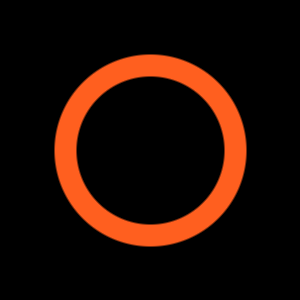

In [59]:
img

### Example 1: Sierpinski gasket

* Draw a cyan pixel at some location.
* Choose a corner of the image other than the lower right, at random, and move half way toward it.
* Repeat.

After thousands of iterations, the pixels form a nice pattern.

In [60]:
img = Image.new("RGB",(300,300),color=(0,0,0))

In [61]:
curx = 150
cury = 150

In [62]:
corners = [ (0,0), (299,0), (0,299) ]

In [63]:
import random

In [64]:
for _ in range(50_000):
    img.putpixel( (int(curx),int(cury)), (0,255,255))
    chosen_corner = random.choice(corners)
    curx = 0.5*(curx + chosen_corner[0])
    cury = 0.5*(cury + chosen_corner[1])

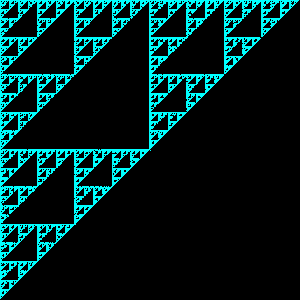

In [32]:
img

In [65]:
img.save("sierpinski.png")  # Yes good

In [66]:
img.save("sierpinski.jpeg",quality=10)  # No NO BAD BAD BAD; sharp contrast = poor JPEG

### Example 2: Random walk

* Draw a magenta pixel at some location.
* Change the location by 1 pixel in the vertical or horizontal direction (at random)
* Repeat.

After thousands of iterations, the pixels show an interesting path of WanderBot movement.

In [67]:
img = Image.new("RGB",(300,300),color=(0,0,0))

In [68]:
curx = 150
cury = 150
displacements = [ (1,0), (-1,0), (0,1), (0,-1) ]
for _ in range(50_000):
    try:
        img.putpixel( (int(curx),int(cury)), (255,0,255))
    except IndexError:
        pass
    delta = random.choice(displacements)
    curx += delta[0]
    cury += delta[1]

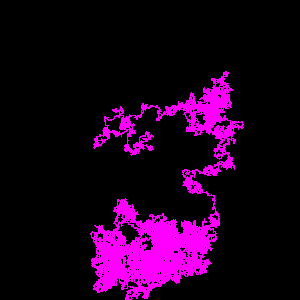

In [69]:
img

In [72]:
img.save("randomwalk.png") # Yes, good for pixel art and other high-contrast images

In [73]:
img.save("randomwalk-should-not-be-saved-as.jpeg",quality=10) # NO BAD BAD BAD, the high contrast will mean compression artifacts